In [7]:
#in this cell define the user-defined parameters needed for the notebook to run
mzmlFolder = "example_data_for_colab/xcms_example_data" #path to raw data folder
peakFile = "example_data_for_colab/xcms_example_data/peaks.csv"
resolution = 60
ms1ppm = 20
noise_threshold = 1000 #minimum signal to consider as peak
score_threshold = 0.99 #score threshold to consider a curated peak (0-1)

In [6]:
#in this cell, define all relevant functions, install required packages, and generate/download example data
import PeakDetective
import os
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

os.system("git clone https://github.com/pattilab/example_data_for_colab.git")

fatal: destination path 'example_data_for_colab' already exists and is not an empty directory.


32768

In [3]:
#read in peak list
peaklist = pd.read_csv(peakFile)
peaklist

,Row.names,mz,mzmin,mzmax,rt,rtmed,rtmin,rtmax,npeaks,X1,ms_level,control_1.mzML,control_2.mzML,control_3.mzML
0,FT0001,60.992711,60.992636,60.992816,24.409533,1464.5720,1463.853,1465.189,3,3,1,15742.891420,23102.473110,21274.041590
1,FT0002,61.988057,61.987939,61.988121,24.149733,1448.9840,1448.640,1449.029,3,3,1,39207.433760,39742.912290,37453.930730
2,FT0003,61.988023,61.987972,61.988191,24.415033,1464.9020,1463.853,1465.189,3,3,1,35692.141490,38376.501860,46028.022700
3,FT0004,62.013890,61.998381,62.029569,2.018958,121.1375,120.597,122.562,6,3,1,29876.205500,17009.247300,14652.288520
4,FT0005,61.998361,61.998352,61.998370,3.616133,216.9680,216.929,217.899,3,3,1,233627.735500,218358.642400,225214.290600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,FT5132,1557.925481,1557.923836,1557.925581,7.935267,476.1160,476.097,476.156,3,3,1,26956.527530,21287.197780,21979.620020
5132,FT5133,1558.927057,1558.926581,1558.927617,7.934950,476.0970,475.163,476.116,3,3,1,10642.103930,6729.369259,11157.421650
5133,FT5134,1644.169381,1644.167000,1644.171761,8.059592,483.5755,482.114,485.037,2,2,1,10744.186160,9282.806841,6702.762019
5134,FT5135,1646.584444,1646.582179,1646.584972,6.727050,403.6230,402.611,403.662,3,3,1,13537.798870,10316.719380,8120.829033


In [4]:
#load raw data
raw_data = []
for file in [x for x in os.listdir(mzmlFolder) if ".mzML" in x]:
    temp = rawData()
    temp.readRawDataFile(mzmlFolder + "/" + file,ms1ppm)
    raw_data.append(temp)


In [10]:
#define PeakDetective object
integ = PeakDetective.PeakDetective(numCores = 10,resolution=60)

2024-02-03 22:50:24.250697: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-02-03 22:50:24.250747: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-03 22:50:24.250759: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-03 22:50:24.250963: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-03 22:50:24.251371: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
if __name__ == "__main__":
    X = integ.makeDataMatrix(raw_data,peaklist["mz"],peaklist["rt"].values,align=align)

NameError: name 'raw_data' is not defined

In [8]:
#perform curation
if __name__ == "__main__":
    ms1_peaks_curated,X_norm,X_orig,tics,scores,progress,peak_scores = integ.curatePeaks(raw_data,peaklist,min_peaks=20000,shift=2.0,smooth_epochs=10,threshold=score_threshold,noise=noise_threshold)

9/9 [==============================] - 0s 3ms/step
done
training classifier...
Epoch 1/10
651/651 [==============================] - 4s 5ms/step - loss: 0.7222 - mean_absolute_error: 0.4834 - val_loss: 0.5758 - val_mean_absolute_error: 0.3735
Epoch 2/10
651/651 [==============================] - 3s 5ms/step - loss: 0.6538 - mean_absolute_error: 0.4466 - val_loss: 0.5102 - val_mean_absolute_error: 0.3061
Epoch 3/10
651/651 [==============================] - 3s 5ms/step - loss: 0.5047 - mean_absolute_error: 0.3063 - val_loss: 0.3651 - val_mean_absolute_error: 0.1772
Epoch 4/10
651/651 [==============================] - 3s 5ms/step - loss: 0.1934 - mean_absolute_error: 0.0803 - val_loss: 0.1593 - val_mean_absolute_error: 0.0651
Epoch 5/10
651/651 [==============================] - 3s 5ms/step - loss: 0.0926 - mean_absolute_error: 0.0350 - val_loss: 0.0924 - val_mean_absolute_error: 0.0374
Epoch 6/10
651/651 [==============================] - 3s 5ms/step - loss: 0.0633 - mean_absolute_erro

In [9]:
#show peak scores for each file
peak_scores

,Row.names,mz,mzmin,mzmax,rt,rtmed,rtmin,rtmax,npeaks,X1,ms_level,control_1.mzML,control_2.mzML,control_3.mzML,example_data_for_colab/xcms_example_data/control_1.mzML,example_data_for_colab/xcms_example_data/control_2.mzML,example_data_for_colab/xcms_example_data/control_3.mzML
0,FT0001,60.992711,60.992636,60.992816,24.409533,1464.5720,1463.853,1465.189,3,3,1,15742.891420,23102.473110,21274.041590,0.999676,0.999998,0.999996
1,FT0002,61.988057,61.987939,61.988121,24.149733,1448.9840,1448.640,1449.029,3,3,1,39207.433760,39742.912290,37453.930730,0.999953,0.999577,0.999888
2,FT0003,61.988023,61.987972,61.988191,24.415033,1464.9020,1463.853,1465.189,3,3,1,35692.141490,38376.501860,46028.022700,0.999951,0.999950,0.999985
3,FT0004,62.013890,61.998381,62.029569,2.018958,121.1375,120.597,122.562,6,3,1,29876.205500,17009.247300,14652.288520,0.000107,0.000076,0.000084
4,FT0005,61.998361,61.998352,61.998370,3.616133,216.9680,216.929,217.899,3,3,1,233627.735500,218358.642400,225214.290600,0.591859,0.853447,0.733251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,FT5132,1557.925481,1557.923836,1557.925581,7.935267,476.1160,476.097,476.156,3,3,1,26956.527530,21287.197780,21979.620020,1.000000,1.000000,1.000000
5132,FT5133,1558.927057,1558.926581,1558.927617,7.934950,476.0970,475.163,476.116,3,3,1,10642.103930,6729.369259,11157.421650,1.000000,1.000000,1.000000
5133,FT5134,1644.169381,1644.167000,1644.171761,8.059592,483.5755,482.114,485.037,2,2,1,10744.186160,9282.806841,6702.762019,1.000000,1.000000,1.000000
5134,FT5135,1646.584444,1646.582179,1646.584972,6.727050,403.6230,402.611,403.662,3,3,1,13537.798870,10316.719380,8120.829033,1.000000,1.000000,1.000000


In [10]:
#list curated peaks for one file
ms1_peaks_curated['example_data_for_colab/xcms_example_data/control_1.mzML']

,Row.names,mz,mzmin,mzmax,rt,rtmed,rtmin,rtmax,npeaks,X1,ms_level,control_1.mzML,control_2.mzML,control_3.mzML
0,FT0001,60.992711,60.992636,60.992816,24.409533,1464.5720,1463.853,1465.189,3,3,1,15742.891420,23102.473110,21274.041590
1,FT0002,61.988057,61.987939,61.988121,24.149733,1448.9840,1448.640,1449.029,3,3,1,39207.433760,39742.912290,37453.930730
2,FT0003,61.988023,61.987972,61.988191,24.415033,1464.9020,1463.853,1465.189,3,3,1,35692.141490,38376.501860,46028.022700
5,FT0006,61.998362,61.998351,61.998367,5.767100,346.0260,346.006,348.051,3,3,1,215506.048500,812061.765300,168090.826000
6,FT0007,61.998371,61.998371,61.998372,5.038675,302.3205,302.309,302.332,2,2,1,306072.845300,241827.729800,276217.617600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,FT5132,1557.925481,1557.923836,1557.925581,7.935267,476.1160,476.097,476.156,3,3,1,26956.527530,21287.197780,21979.620020
5132,FT5133,1558.927057,1558.926581,1558.927617,7.934950,476.0970,475.163,476.116,3,3,1,10642.103930,6729.369259,11157.421650
5133,FT5134,1644.169381,1644.167000,1644.171761,8.059592,483.5755,482.114,485.037,2,2,1,10744.186160,9282.806841,6702.762019
5134,FT5135,1646.584444,1646.582179,1646.584972,6.727050,403.6230,402.611,403.662,3,3,1,13537.798870,10316.719380,8120.829033


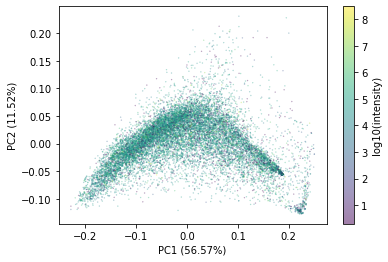

In [11]:
#make PCA of data colored by TIC
pca = PCA(2)
loads = pca.fit_transform(X_norm)
plt.scatter(loads[:,0],loads[:,1],c=tics,s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="log10(intensity)")

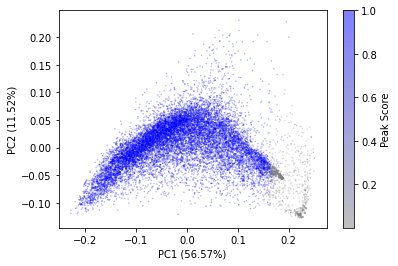

In [12]:
pca = PCA(2)
loads = pca.fit_transform(X_norm)
colormap = LinearSegmentedColormap.from_list("test",colors=["grey", "blue"],N=256)
plt.scatter(loads[:,0],loads[:,1],c=scores,s=.1,alpha=.5,cmap=colormap)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="Peak Score")